In [53]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array 
from tensorflow import keras
import matplotlib.pyplot as plt


In [35]:
#dimensions of our images
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 1000
nb_validation_samples = 100
epochs = 40
batch_size = 20

In [36]:

if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width,img_height)
else:
	input_shape = (img_width,img_height, 3)

train_datagen = 	ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)


In [37]:

#This is the augmentation configuration we will use for testing:
#only rescaling
test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size= (img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width,img_height),
	batch_size=batch_size,
	class_mode='binary')


Found 24958 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [38]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.summary()

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
	          optimizer='rmsprop',
	          metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_25 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                  

In [60]:

#This is the augmentation configuration we will use for training

history = model.fit(train_generator,
	steps_per_epoch= nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)

Epoch 1/40
50/50 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.7480WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 5 batches). You may need to use the repeat() function when building your dataset.


50/50 [==============================] - 50s 989ms/step - loss: 0.5488 - accuracy: 0.7480 - val_loss: 0.3865 - val_accuracy: 0.8000
Epoch 2/40
50/50 [==============================] - 50s 1s/step - loss: 0.5308 - accuracy: 0.7350
Epoch 3/40
50/50 [==============================] - 46s 884ms/step - loss: 0.5149 - accuracy: 0.7420
Epoch 4/40
50/50 [==============================] - 38s 753ms/step - loss: 0.5149 - accuracy: 0.7440
Epoch 5/40
50/50 [==============================] - 35s 694ms/step - loss: 0.4991 - accuracy: 0.7600
Epoch 6/40
50/50 [==============================] - 31s 622ms/step - loss: 0.5087 - accuracy: 0.7595
Epoch 7/40
50/50 [==============================] - 32s 645ms/step - loss: 0.5028 - accuracy: 0.7730
Epoch 8/40
50/50 [==============================] - 31s 625ms/step - loss: 0.5237 - accuracy: 0.7770
Epoch 9/40
50/50 [==============================] - 28s 545ms/step - loss: 0.5190 - accuracy: 0.7460
Epoch 10/40
50/50 [==============================] - 24s 477ms/

/home/shekhar/anaconda3/envs/ml/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


50/50 [==============================] - 18s 353ms/step - loss: 0.4581 - accuracy: 0.7930
Epoch 22/40
50/50 [==============================] - 17s 333ms/step - loss: 0.4617 - accuracy: 0.7890
Epoch 23/40
50/50 [==============================] - 17s 335ms/step - loss: 0.4283 - accuracy: 0.7990
Epoch 24/40
50/50 [==============================] - 17s 336ms/step - loss: 0.4832 - accuracy: 0.7700
Epoch 25/40
50/50 [==============================] - 17s 343ms/step - loss: 0.4802 - accuracy: 0.7810
Epoch 26/40
50/50 [==============================] - 18s 364ms/step - loss: 0.4725 - accuracy: 0.7880
Epoch 27/40
50/50 [==============================] - 18s 352ms/step - loss: 0.4521 - accuracy: 0.7860
Epoch 28/40
50/50 [==============================] - 18s 356ms/step - loss: 0.4594 - accuracy: 0.7830
Epoch 29/40
50/50 [==============================] - 19s 364ms/step - loss: 0.5050 - accuracy: 0.7670
Epoch 30/40
50/50 [==============================] - 18s 358ms/step - loss: 0.4280 - accuracy:

In [48]:
img_pred = load_img('data/validation/cats/89.jpg',target_size=(150, 150))
img_pred = img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0 )

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
	prediction = "dog"
else:
	prediction = "cat"

print(prediction)

1/1 [==============================] - 0s 30ms/step
[[3.8827295e-27]]
cat


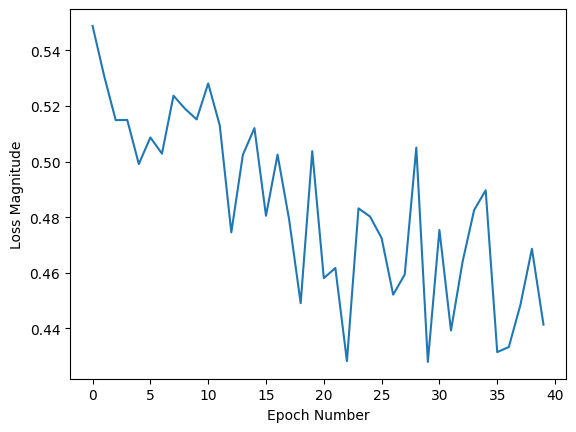

In [62]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])